In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in jump history
df = pd.read_csv("./batRABV.jumpHistory_removeburnin.log", sep="\t")
df.head()

,state,from,to,time
0,6000000,California,Washington,9.411268
1,6000000,Texas,California,3.507698
2,6000000,NewJersey,Virginia,7.758510
3,6000000,Texas,Virginia,5.236419
4,6000000,California,Texas,3.109071


In [3]:
most_recent_sampling_time = 2005.5 # Obtained from metadata

In [4]:
# Convert node heights to time
df["time"] = most_recent_sampling_time - df["time"]
df.head()

,state,from,to,time
0,6000000,California,Washington,1996.088732
1,6000000,Texas,California,2001.992302
2,6000000,NewJersey,Virginia,1997.741490
3,6000000,Texas,Virginia,2000.263581
4,6000000,California,Texas,2002.390929


In [5]:
# Get number of jumps between California and Washington
number_of_jumps = df[(df["from"] == "California") & (df["to"] == "Washington")].groupby('state').size()

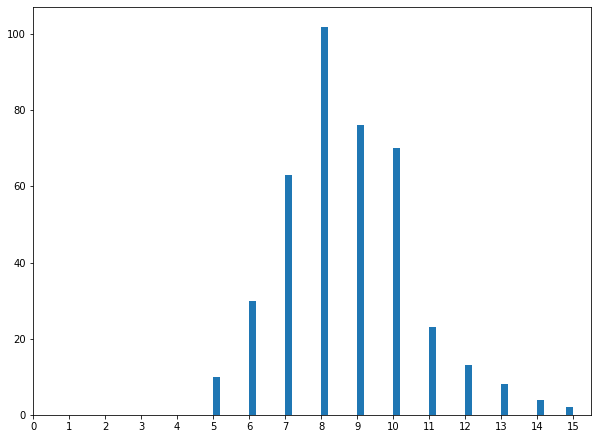

In [6]:
# Plot a histogram
f,ax = plt.subplots(figsize=(10, 7.5))
ax.hist(number_of_jumps, bins = 50)
ax.set_xticks(range(16))
plt.show()

In [7]:
# Median number of jumps between California and Washington
number_of_jumps.median()

8.0

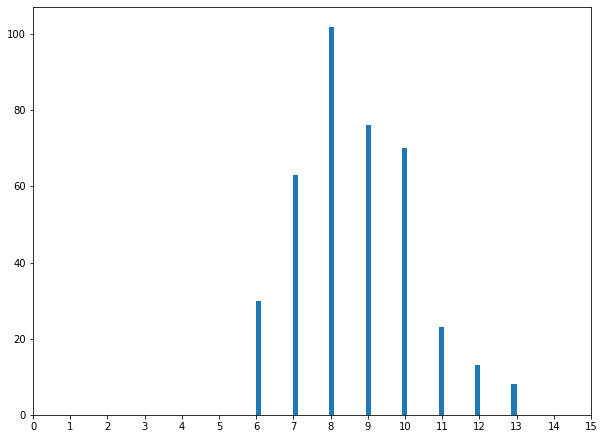

In [8]:
# What is the 95% HPD?
number_of_jumps_95_hpd = number_of_jumps[(number_of_jumps >= number_of_jumps.quantile(0.025)) & (number_of_jumps <= number_of_jumps.quantile(0.975))]
f,ax = plt.subplots(figsize=(10, 7.5))
ax.hist(number_of_jumps_95_hpd, bins = 50)
ax.set_xticks(range(16))
plt.show()

In [9]:
# Median number of jumps from California to Washington = 8 (95% HPD: [6, 12])
print("{} (95% HPD: [{}, {}])".format(
    number_of_jumps_95_hpd.median(), 
    number_of_jumps_95_hpd.quantile(0.025), 
    number_of_jumps_95_hpd.quantile(0.975)
))

8.0 (95% HPD: [6.0, 12.0])


In [10]:
# What is the first jump into Washington?
first_jump = df[(df["to"] == "Washington")].sort_values("time").groupby('state').nth(0)

<AxesSubplot:>

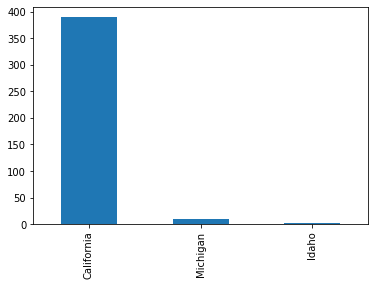

In [11]:
first_jump["from"].value_counts().plot(kind="bar")

1926.717138367988

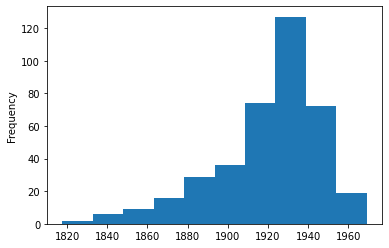

In [12]:
# So most jumps are coming from California. What is the time? 
first_jump[first_jump["from"] == "California"]["time"].plot.hist()
first_jump[first_jump["from"] == "California"]["time"].median()

In [13]:
# Function to convert years to date format
# Gist at https://gist.github.com/gkarthik/2852f66dc335d8533ff174614d03fca5
from datetime import datetime ,timedelta
import sys

def decimal_to_date(given_year):
    base = datetime(int(given_year),1,1)
    year_rem = given_year - int(given_year)

    calc_date = (base + timedelta(seconds = (base.replace(year = base.year+1) - base).total_seconds() * year_rem ))
    print(calc_date.strftime("%d %b %Y"))

In [14]:
decimal_to_date(first_jump[first_jump["from"] == "California"]["time"].median())

19 Sep 1926


<AxesSubplot:ylabel='Frequency'>

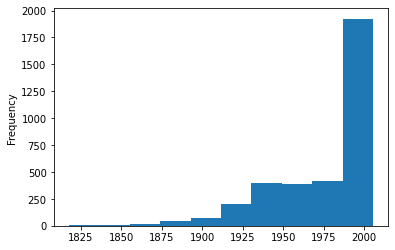

In [15]:
# What is the distribution of jumps?
all_jump_times = df[(df["from"] == "California") & (df["to"] == "Washington")]
all_jump_times["time"].plot.hist()

In [16]:
all_jump_times

,state,from,to,time
0,6000000,California,Washington,1996.088732
13,6000000,California,Washington,2004.781535
21,6000000,California,Washington,1972.924230
24,6000000,California,Washington,2003.152386
48,6000000,California,Washington,1971.794538
...,...,...,...,...
62931,10000000,California,Washington,1968.068406
62938,10000000,California,Washington,1947.271176
62940,10000000,California,Washington,1992.402482
62951,10000000,California,Washington,1994.069063
